**Import library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

**Load data from keras**

In [17]:
(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()

In [19]:
# split into x_val, y_val, x_train, y_train
flag = 50000

X_train, y_train = X_train_val[:flag], y_train_val[:flag]

X_val, y_val = X_train_val[flag:], y_train_val[flag:]

len(X_train), X_test.shape, y_train.shape

(50000, (10000, 28, 28), (50000,))

In [20]:
y_train[0]

5

In [21]:
X_train.shape[0]

50000

**CNN model keras need shape(N, W, H, D)**
* N: sample
* W: width
* H: height
* D: dimension

In [22]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**Convert label `y` into categori**

In [23]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print('Before convert ', y_train[0])
print('After convert ',Y_train[0])

Before convert  5
After convert  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Định nghĩa model**:

1. Model = `Sequential()` để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT

2. Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)

3. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: `K` (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: `model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))`

4. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, `model.add(MaxPooling2D(pool_size=(W, H)))`

5. Bước Flatten chuyển từ tensor sang vector chỉ cần thêm flatten layer.

6. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: `model.add(Dense(số_lượng_node activation='tên_hàm activation'))`

In [24]:
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang array(vector)
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

**Compile model**

Cần chỉ rõ hàm `loss()` function nào được dùng, `optimizer()` nào được dùng để tối ưu

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## **Train model**

Define `batch_size` = 32, `epochs` = 10

In [26]:
model_fitted = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 38s 4ms/step - loss: 0.7858 - accuracy: 0.7752 - val_loss: 0.0794 - val_accuracy: 0.9803
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0643 - accuracy: 0.9831 - val_loss: 0.0523 - val_accuracy: 0.9851
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9889 - val_loss: 0.0446 - val_accuracy: 0.9877
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0392 - val_accuracy: 0.9881
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0162 - accuracy: 0.9959 - val_loss: 0.0415 - val_accuracy: 0.9879
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.0387 - val_accuracy: 0.9898
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0386 - val_accuracy

**Visualize data**


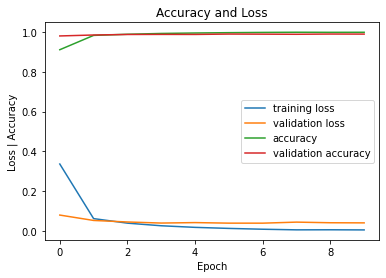

In [31]:
fig, ax = plt.subplots()

lim_x = np.arange(0, 10)

ax.plot(lim_x, model_fitted.history['loss'], label='training loss')
ax.plot(lim_x, model_fitted.history['val_loss'], label='validation loss')
ax.plot(lim_x, model_fitted.history['accuracy'], label='accuracy')
ax.plot(lim_x, model_fitted.history['val_accuracy'], label='validation accuracy')

ax.set_title('Accuracy and Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss | Accuracy')
ax.legend()

plt.show()

**Oánh giá model**

In [64]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f"accuracy: {score[1] * 100:.2f}%")
print(f"loss: {score[0]:.3f}")

accuracy: 98.95%
loss: 0.035


### Predict random image

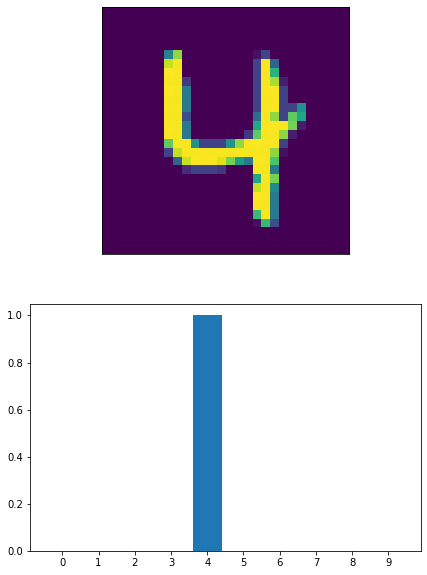

Model Predict:  4


In [109]:
img = X_test[49]

def show_pred_img(img, md):
  fig, (ax1, ax2) = plt.subplots(figsize=(7,10),ncols=1, nrows=2)
  ax1.imshow(img.reshape(28,28))
  ax1.set_xticks([])
  ax1.set_yticks([])

  y_predict = md.predict(img.reshape(1,28,28,1))

  # visualize on matplotlib
  ax2.bar(np.arange(len(y_predict[0])), y_predict[0])
  ax2.set_xticks(range(10))
  plt.show();

  print('Model Predict: ', np.argmax(y_predict))

show_pred_img(img, model)

In [66]:
import os
import datetime

# Create a function to save a model
def save_model(model, suffix=None):
  '''
  Saves a given model in a models directory and appends a suffix (string).
  '''
  # create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/recognize-number-keras",
                          datetime.datetime.now().strftime("%Y%m%m - %H%M%s"))
  # save format of model
  model_path = modeldir+"_"+suffix+".h5"
  print(f'saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [71]:
import tensorflow as tf

# create a funtion to load a trained models
def load_model(model_path):
  '''
  Loads a saved model from a specified path.
  '''
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path)
  return model

In [67]:
# save model
save_model(model, 'recognize_number_keras_adam')

saving model to: /content/drive/MyDrive/recognize-number-keras/20210505 - 14071620914862_recognize_number_keras_adam.h5...


'/content/drive/MyDrive/recognize-number-keras/20210505 - 14071620914862_recognize_number_keras_adam.h5'

In [69]:
# model current
score = model.evaluate(X_test, Y_test, verbose=0)
print(f"accuracy: {score[1] * 100:.2f}%")
print(f"loss: {score[0]:.3f}")

accuracy: 98.95%
loss: 0.035


In [72]:
# load model and score

model_loaded = load_model('/content/drive/MyDrive/recognize-number-keras/20210505 - 14071620914862_recognize_number_keras_adam.h5')

score_model_loaded = model_loaded.evaluate(X_test, Y_test, verbose=0)
print(f"accuracy: {score_model_loaded[1] * 100:.2f}%")
print(f"loss: {score_model_loaded[0]:.3f}")

Loading saved model from: /content/drive/MyDrive/recognize-number-keras/20210505 - 14071620914862_recognize_number_keras_adam.h5
accuracy: 98.95%
loss: 0.035


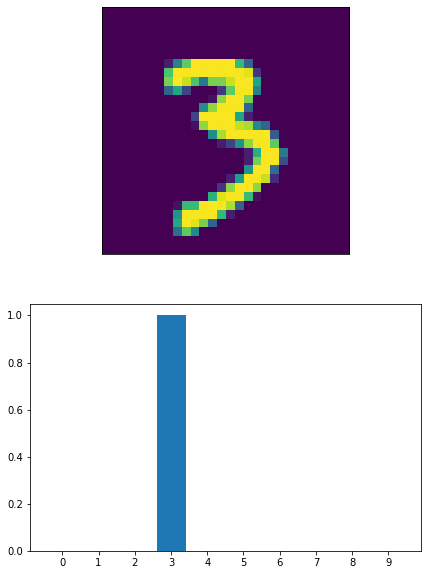

Model Predict:  3


In [111]:
# loaded_model predict

show_pred_img(X_test[30], model_loaded)